2023/2/28<br>
This code is for comparing MFA values obtained by POM and XRD.<br>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats

In [2]:
current_path=os.getcwd()
excel_path=os.path.join(current_path, "excel")
save_path=os.path.join(current_path, "fig_save")
if os.path.exists(save_path)==False:
    os.makedirs(save_path)

df_list=[]
for curdir, _, files in os.walk(excel_path):
    if len(files)>0:
        df_temp_list=[]
        for file in files:
            df=pd.read_excel(os.path.join(curdir, file))
            df_temp_list.append(df)
        
        df_concat=pd.concat(df_temp_list)
        df_concat=df_concat.sort_values("sample_name")
        df_concat.index=np.arange(0, len(df_concat))
        df_list.append(df_concat)
    
df_POM=df_list[0]        
df_XRD=df_list[1]

calculation of correlation coeffcient

In [3]:
r_mean, p_mean=stats.pearsonr(df_POM["MFA_mean"], df_XRD["MFA(degree)"])
r_median, p_median=stats.pearsonr(df_POM["MFA_median"], df_XRD["MFA(degree)"])
r_mode, p_mode=stats.pearsonr(df_POM["MFA_mode"], df_XRD["MFA(degree)"])

result vizualization without errorbars

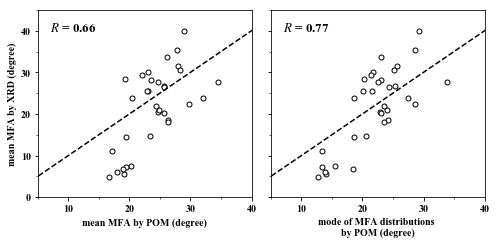

In [4]:
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["mathtext.fontset"]="stix"
x=np.arange(-10, 60)
y=x

fig, ax=plt.subplots(1, 2, figsize=(7, 3.5), sharey="all", sharex="all")

#mean
ax[0].plot(x, y, linestyle="--", c="black")
ax[0].scatter(df_POM["MFA_mean"], df_XRD["MFA(degree)"], 
             marker="o", color="w", edgecolor="black", s=25)
ax[0].set_yticks(np.arange(0, 50, 10), minor=False)
ax[0].set_yticks(np.arange(0, 50, 5), minor=True)
ax[0].set_xticks(np.arange(0, 50, 10))
ax[0].set_xticks(np.arange(0, 50, 5), minor=True)
#ax.set_yticklabels(["A", "B", "C"])

ax[0].set_xlim(5, 40)
ax[0].set_ylim(0, 45)
ax[0].set_xlabel("mean MFA by POM (degree)")
ax[0].set_ylabel("mean MFA by XRD (degree)")
ax[0].text(7, 40, r"${R}$ = "+str(np.round(r_mean, 2)), fontsize=13)

#mode
ax[1].plot(x, y, linestyle="--", c="black")
ax[1].scatter(df_POM["MFA_mode"], df_XRD["MFA(degree)"], 
             marker="o", color="w", edgecolor="black", s=25)

ax[1].set_xlabel("mode of MFA distributions \nby POM (degree)")
ax[1].text(7, 40, r"${R}$ = "+str(np.round(r_mode, 2)), fontsize=13)

plt.tight_layout()
plt.savefig(os.path.join(save_path, "POM_vs_XRD_without_err.png"), dpi=1200)
plt.show()
plt.close()

result vizualization with errorbars

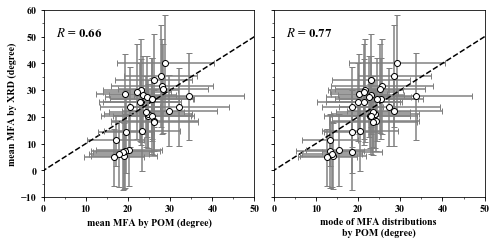

In [5]:
fig, ax=plt.subplots(1, 2, figsize=(7, 3.5), sharey="all", sharex="all")

#mean
ax[0].plot(x, y, linestyle="--", c="black")
ax[0].errorbar(df_POM["MFA_mean"], df_XRD["MFA(degree)"], xerr=df_POM["MFA_std"], yerr=df_XRD["MFA_std"], 
             fmt="o", color="w", markeredgecolor="black", markersize=6
             ,ecolor="gray", capsize=3, capthick=1)
ax[0].set_yticks(np.arange(-10, 70, 10), minor=False)
ax[0].set_yticks(np.arange(-10, 70, 5), minor=True)
ax[0].set_xticks(np.arange(0, 70, 10))
ax[0].set_xticks(np.arange(0, 70, 5), minor=True)
ax[0].set_xlim(0, 50)
ax[0].set_ylim(-10, 60)
ax[0].set_xlabel("mean MFA by POM (degree)")
ax[0].set_ylabel("mean MFA by XRD (degree)")
ax[0].text(3, 50, r"${R}$ = "+str(np.round(r_mean, 2)), fontsize=13)

#mode
ax[1].plot(x, y, linestyle="--", c="black")
ax[1].errorbar(df_POM["MFA_mode"], df_XRD["MFA(degree)"], xerr=df_POM["MFA_std"], yerr=df_XRD["MFA_std"], 
             fmt="o", color="w", markeredgecolor="black", markersize=6
             ,ecolor="gray", capsize=3, capthick=1)
ax[1].text(3, 50, r"${R}$ = "+str(np.round(r_mode, 2)), fontsize=13)

ax[1].set_xlabel("mode of MFA distributions \nby POM (degree)")
plt.tight_layout()
plt.savefig(os.path.join(save_path, "POM_vs_XRD_with_err.png"), dpi=1200)
plt.show()
plt.close()